In [173]:
#import all the necessary libraries
import numpy as np
import pandas as pd
# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# To Scale our data
from sklearn.preprocessing import scale
# for modeling
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [174]:
#read the data set
house = pd.read_csv(r"C:\Users\sunil\OneDrive\Desktop\Data science\Assignment Advanced Regression\train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [175]:
#General quality check
house.shape

(1460, 81)

In [176]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [177]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [178]:
#Missing Value Treatment
print(round((house.isnull().sum()/len(house.index)*100),2).sort_values(ascending = False))

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

In [179]:
#lets find the columns which has more than 45% of null data
cols_to_drop = house.columns[round((house.isnull().sum()/len(house.index)*100),2)>45]
cols_to_drop

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [180]:
#lets drop the columns which has more than 45% of null data
house.drop(cols_to_drop,axis = 1, inplace = True)

In [181]:
#let's check the missing values
print(round((house.isnull().sum()/len(house.index)*100),2).sort_values(ascending = False))

LotFrontage      17.74
GarageFinish      5.55
GarageType        5.55
GarageCond        5.55
GarageQual        5.55
GarageYrBlt       5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofStyle         0.00
RoofMatl          0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
Condition1        0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

Lets check each feature one by one to understand the importance of the feature. After that we can either drop the feature or drop the rows or impute the null values.

In [182]:
#Let check the feature 'LotFrontage'
house['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [183]:
#lets impute the mean in the missing values of LotFrontage
house['LotFrontage'].fillna(house['LotFrontage'].mean(), inplace = True)

In [184]:
#NA in features like 'GarageFinish','GarageType','GarageCond','GarageQual' means there is no garage
# lets create a new category 'No Garage' and impute it in the missing values
house['GarageFinish'].fillna('No Garage', inplace = True)
house['GarageType'].fillna('No Garage', inplace = True)
house['GarageCond'].fillna('No Garage', inplace = True)
house['GarageQual'].fillna('No Garage', inplace = True)

In [185]:
#For other features the % of missing values is very less
#So lets drop the rows
house = house.dropna()

In [186]:
#Lets look at the data after treating the missing values
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [187]:
house.shape

(1338, 76)

In [188]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 76 columns):
Id               1338 non-null int64
MSSubClass       1338 non-null int64
MSZoning         1338 non-null object
LotFrontage      1338 non-null float64
LotArea          1338 non-null int64
Street           1338 non-null object
LotShape         1338 non-null object
LandContour      1338 non-null object
Utilities        1338 non-null object
LotConfig        1338 non-null object
LandSlope        1338 non-null object
Neighborhood     1338 non-null object
Condition1       1338 non-null object
Condition2       1338 non-null object
BldgType         1338 non-null object
HouseStyle       1338 non-null object
OverallQual      1338 non-null int64
OverallCond      1338 non-null int64
YearBuilt        1338 non-null int64
YearRemodAdd     1338 non-null int64
RoofStyle        1338 non-null object
RoofMatl         1338 non-null object
Exterior1st      1338 non-null object
Exterior2nd      1338 non

In [189]:
#let's convert year to number of years
house['YearBuilt'] = 2019 - house['YearBuilt']
house['YearRemodAdd'] = 2019 - house['YearRemodAdd']
house['GarageYrBlt'] = 2019 - house['GarageYrBlt']
house['YrSold'] = 2019 - house['YrSold']

In [190]:
# Let's Convert the columns from numerical to categorical
#converting from int type to object to treat the variables as categorical variables
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house['BsmtFullBath'] = house['BsmtFullBath'].astype('object')
house['BsmtHalfBath'] = house['BsmtHalfBath'].astype('object')
house['FullBath'] = house['FullBath'].astype('object')
house['HalfBath'] = house['HalfBath'].astype('object')
house['BedroomAbvGr'] = house['BedroomAbvGr'].astype('object')
house['KitchenAbvGr'] = house['KitchenAbvGr'].astype('object')
house['TotRmsAbvGrd'] = house['TotRmsAbvGrd'].astype('object')
house['Fireplaces'] = house['Fireplaces'].astype('object')
house['GarageCars'] = house['GarageCars'].astype('object')

## Outlier Treatment

In [191]:
#lets find the Categorical and Numeric columns
#select categorical and numerical datatypes
cat = house.select_dtypes(include = ['object']).columns
print(cat)
num = house.select_dtypes(exclude = ['object']).columns
print(num)

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea'

## Check for Outliers in Numerical Columns

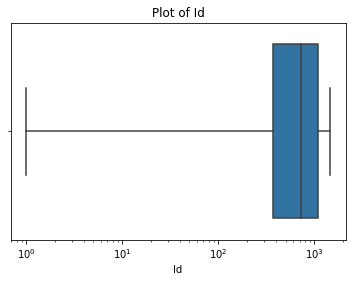

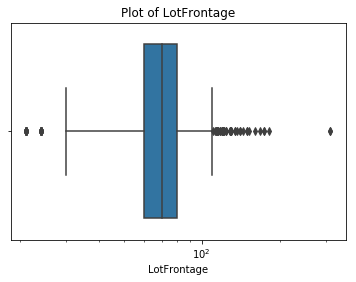

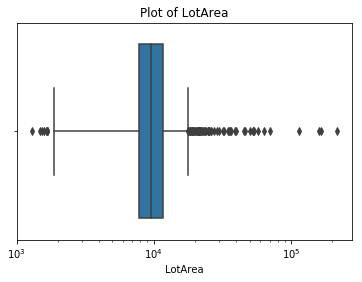

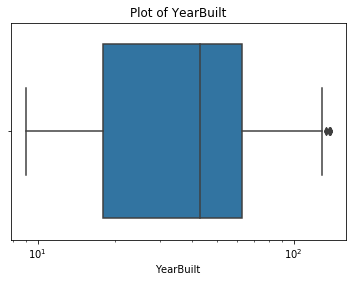

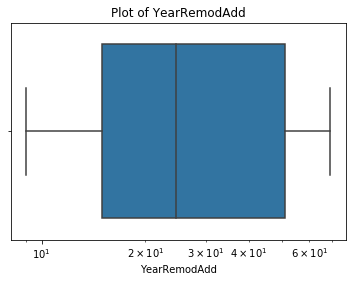

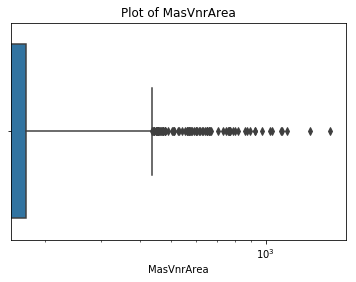

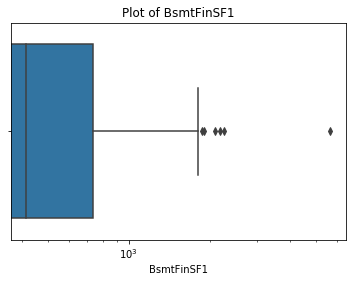

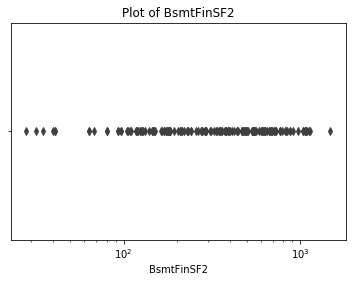

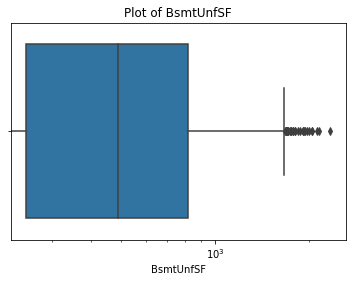

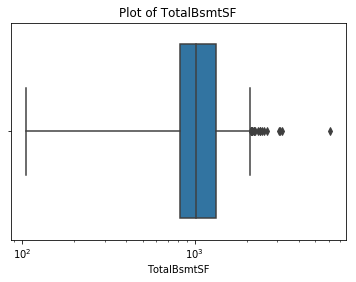

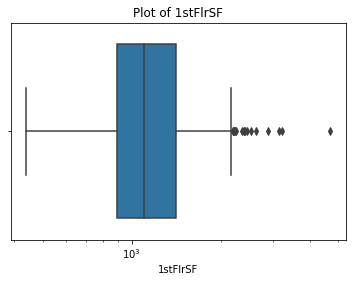

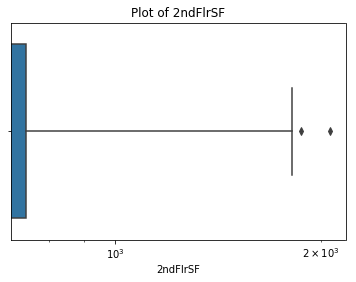

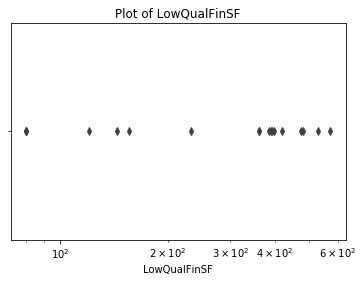

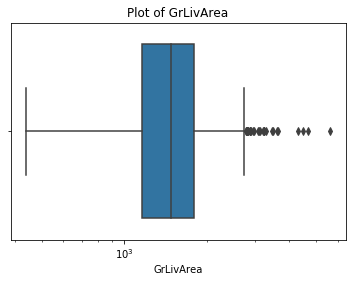

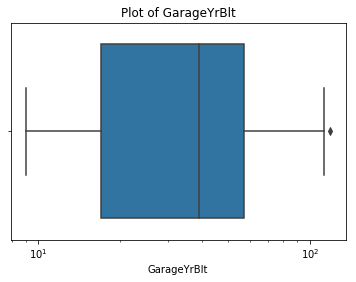

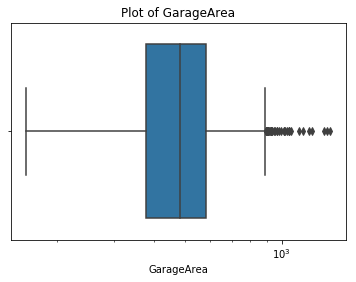

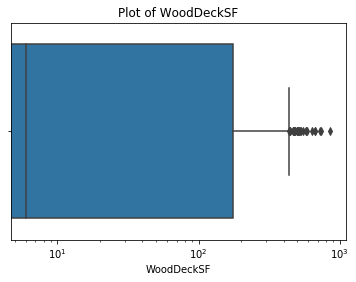

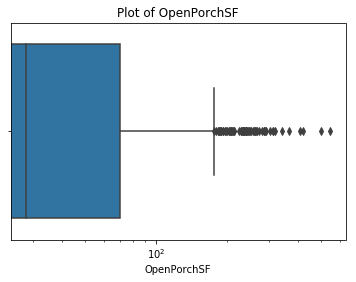

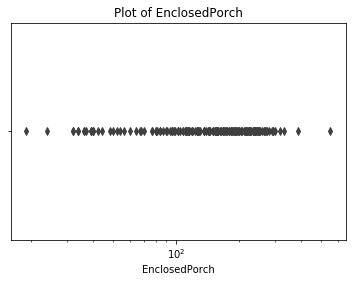

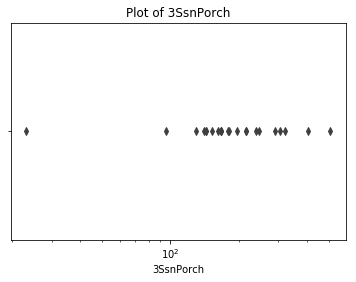

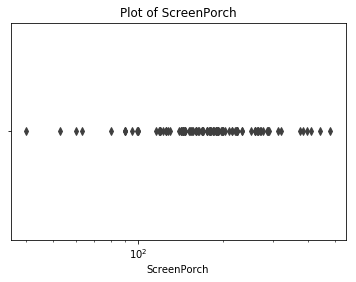

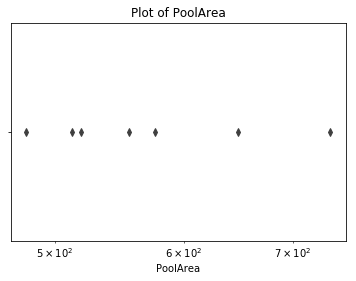

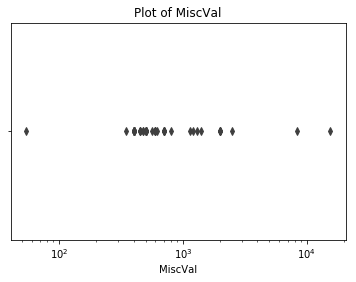

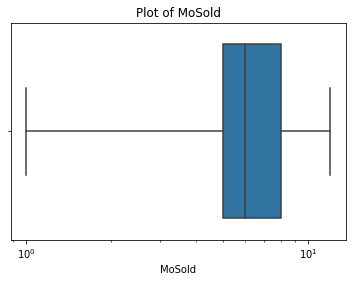

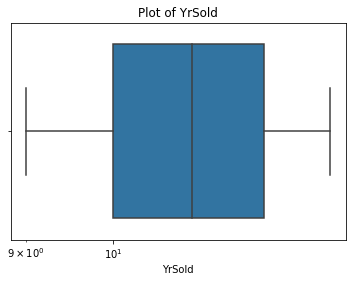

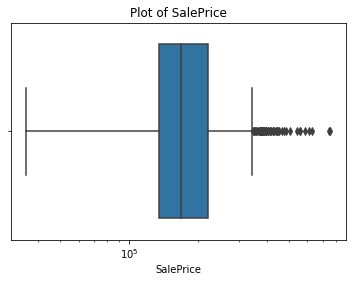

In [192]:
for column in num:
    title = "Plot of "+column
    sns.boxplot(house[column])
    plt.xscale('log')
    plt.title(title)
    plt.show()

In [193]:
house[num].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,...,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,731.228700,70.630187,10706.294469,45.970852,33.331091,110.360239,464.234679,49.218236,582.494768,1095.947683,...,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,11.194320,186761.782511
std,421.779691,22.161578,10336.621126,29.563540,20.296463,185.604816,458.792420,166.196584,439.950528,405.554435,...,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,1.330691,78913.847668
min,1.000000,21.000000,1300.000000,9.000000,9.000000,0.000000,0.000000,0.000000,0.000000,105.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,9.000000,35311.000000
25%,366.250000,60.000000,7744.000000,18.000000,15.000000,0.000000,0.000000,0.000000,248.000000,819.750000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,10.000000,135000.000000
50%,730.500000,70.049958,9600.000000,43.000000,24.500000,0.000000,413.000000,0.000000,489.000000,1021.500000,...,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,11.000000,168500.000000
75%,1098.750000,80.000000,11760.750000,63.000000,51.000000,174.000000,733.000000,0.000000,815.750000,1324.000000,...,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,12.000000,220000.000000
90%,1314.300000,93.000000,14575.900000,93.000000,69.000000,340.000000,1079.900000,134.100000,1242.700000,1616.300000,...,264.300000,130.000000,109.200000,0.000000,0.00000,0.000000,0.000000,10.000000,13.000000,283624.100000
95%,1388.150000,105.000000,17508.850000,100.150000,69.000000,464.300000,1280.300000,412.350000,1480.300000,1754.500000,...,342.300000,172.300000,180.450000,0.000000,168.00000,0.000000,0.000000,11.000000,13.000000,335000.000000
99%,1443.630000,135.890000,39727.700000,119.000000,69.000000,808.600000,1593.790000,858.640000,1798.150000,2156.150000,...,510.260000,283.890000,262.150000,168.000000,272.26000,0.000000,700.000000,12.000000,13.000000,443944.430000


In [194]:
#function to remove Outlier
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.1)
    q3 = df_in[col_name].quantile(0.9)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [195]:
#Remove outlier for LotFrontage column
col_name = 'LotFrontage'
house = remove_outlier(house,col_name)
house.LotFrontage.describe()

count    1331.000000
mean       69.886694
std        19.139074
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       152.000000
Name: LotFrontage, dtype: float64

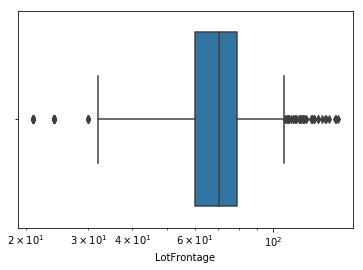

In [196]:
#Boxplot after removing Outlier
sns.boxplot(house['LotFrontage'])
plt.xscale('log')

In [197]:
#Remove outlier for LotArea column
col_name = 'LotArea'
house = remove_outlier(house,col_name)
house.LotArea.describe()

count     1309.000000
mean      9710.490451
std       3765.784037
min       1300.000000
25%       7677.000000
50%       9548.000000
75%      11526.000000
max      26178.000000
Name: LotArea, dtype: float64

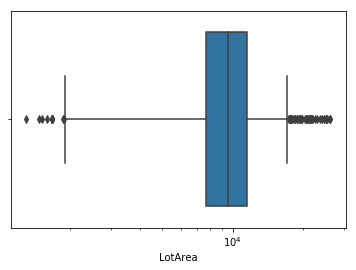

In [198]:
#Boxplot after removing Outlier
sns.boxplot(house['LotArea'])
plt.xscale('log')

In [199]:
#Remove outlier for MasVnrArea column
col_name = 'MasVnrArea'
house = remove_outlier(house,col_name)
house.MasVnrArea.describe()

count    1297.000000
mean       99.170393
std       155.205930
min         0.000000
25%         0.000000
50%         0.000000
75%       169.000000
max       816.000000
Name: MasVnrArea, dtype: float64

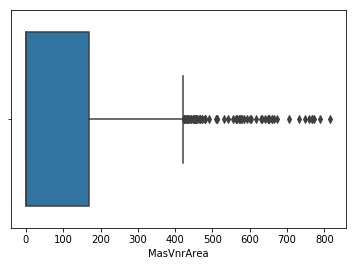

In [200]:
#Boxplot after removing Outlier
sns.boxplot(house['MasVnrArea'])


In [201]:
#Remove outlier for SalePrice column
col_name = 'SalePrice'
house = remove_outlier(house,col_name)
house.SalePrice.describe()

count      1293.000000
mean     181821.218097
std       69299.230730
min       35311.000000
25%      134500.000000
50%      165500.000000
75%      214500.000000
max      501837.000000
Name: SalePrice, dtype: float64

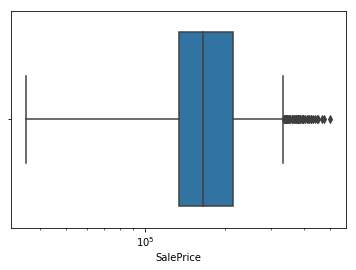

In [202]:
#Boxplot after removing Outlier
sns.boxplot(house['SalePrice'])
plt.xscale('log')

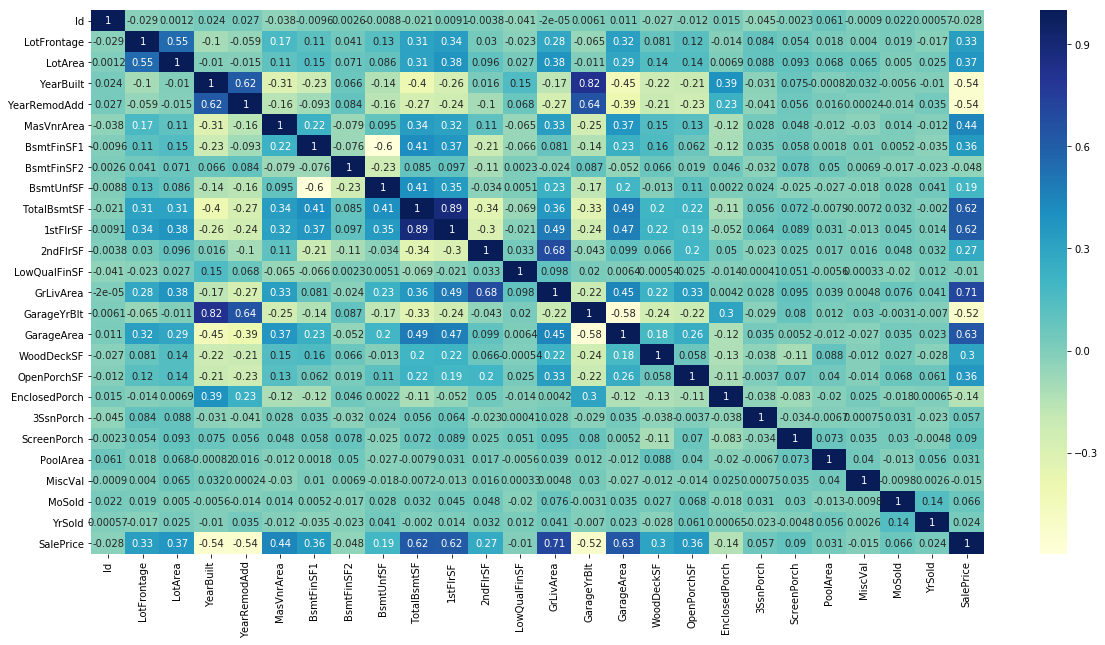

In [203]:
#check for multicollieanrity
plt.figure(figsize = (20,10))
sns.heatmap(house.corr(),annot = True,cmap = 'YlGnBu')
plt.show()

In [204]:
# GarageYrBlt and YearBuilt are highly corellated
# 1stFlrSF and TotalBsmtSF are highly corellated
# BsmtUnfSF and BsmtFinSF1 are highly corellated
# Lets Drop GarageYrBlt ,1stFlrSF and BsmtFinSF1
house.drop('GarageYrBlt',axis = 1,inplace = True)
house.drop('1stFlrSF',axis = 1,inplace = True)
house.drop('BsmtFinSF1',axis = 1,inplace = True)

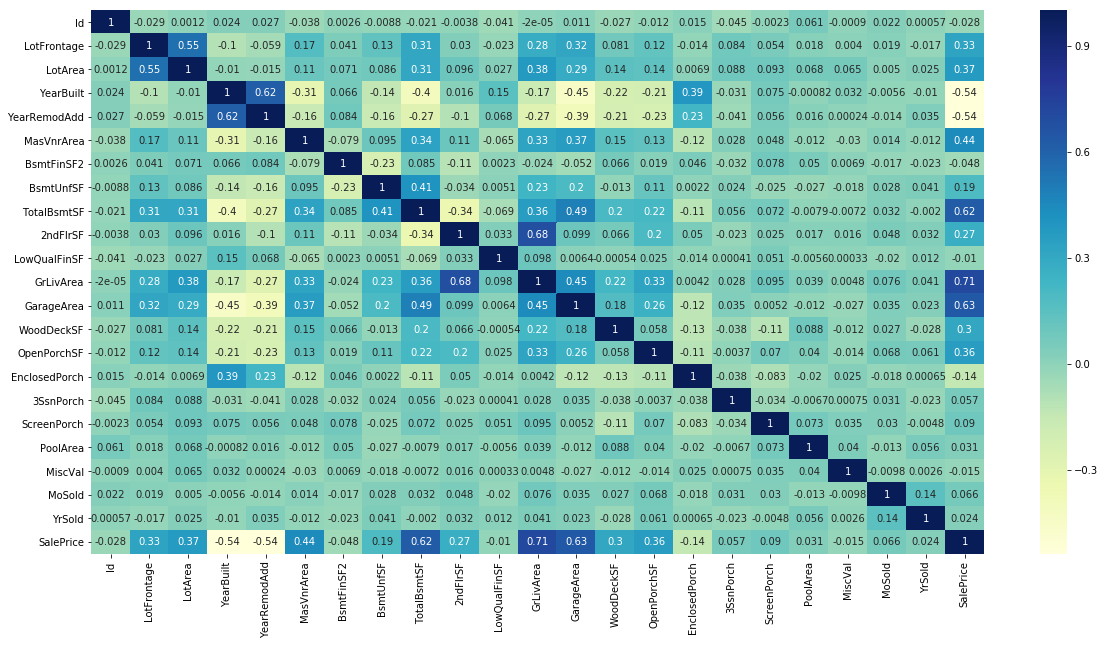

In [205]:
#check for multicollieanrity
plt.figure(figsize = (20,10))
sns.heatmap(house.corr(),annot = True,cmap = 'YlGnBu')
plt.show()

## Dummy Variable Creation



In [206]:
house[cat].nunique()

MSSubClass       15
MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
OverallQual       9
OverallCond       8
RoofStyle         6
RoofMatl          6
Exterior1st      14
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         4
Foundation        5
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           4
HeatingQC         5
CentralAir        2
Electrical        5
BsmtFullBath      3
BsmtHalfBath      3
FullBath          4
HalfBath          3
BedroomAbvGr      7
KitchenAbvGr      3
KitchenQual       4
TotRmsAbvGrd     10
Functional        7
Fireplaces        4
GarageType        6
GarageFinish      3
GarageCars        4
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6


In [207]:
#There are 3 features which has only 2 distinct values
# Street, Utilities, CentralAir
# Lets convert these variable to binary (1/0)
print(house['Street'].value_counts())
print(house['Utilities'].value_counts())
print(house['CentralAir'].value_counts())

Pave    1290
Grvl       3
Name: Street, dtype: int64
AllPub    1292
NoSeWa       1
Name: Utilities, dtype: int64
Y    1233
N      60
Name: CentralAir, dtype: int64


In [208]:
house['Street'] = house['Street'].map({'Pave':1,'Grvl':0})
house['Utilities'] = house['Utilities'].map({'AllPub':1,'NoSeWa':0})
house['CentralAir'] = house['CentralAir'].map({'Y':1,'N':0})

In [209]:
cat = house.select_dtypes(include = ['object']).columns
print(cat)

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


## Dummy Variable creataion

In [210]:
# Create Dummy variables for categorical columns
house_dummies = pd.get_dummies(house[cat], drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [211]:
#concat dummy df with the original
house_final = pd.concat([house,house_dummies],axis = 1)
house_final.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450,1,Reg,Lvl,1,Inside,...,0,0,0,0,1,0,0,0,1,0
1,2,20,RL,80.0,9600,1,Reg,Lvl,1,FR2,...,0,0,0,0,1,0,0,0,1,0
2,3,60,RL,68.0,11250,1,IR1,Lvl,1,Inside,...,0,0,0,0,1,0,0,0,1,0
3,4,70,RL,60.0,9550,1,IR1,Lvl,1,Corner,...,0,0,0,0,1,0,0,0,0,0
4,5,60,RL,84.0,14260,1,IR1,Lvl,1,FR2,...,0,0,0,0,1,0,0,0,1,0


In [212]:
#Let's drop the Original columns
for cols in cat:
    house_final = house_final.drop(cols,axis = 1)

In [213]:
house_final.shape

(1293, 273)

In [214]:
# split into X and y
y = house_final.pop('SalePrice')
X = house_final

## rescaling the variable

In [215]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Id', 'LotFrontage', 'LotArea', 'Street', 'Utilities', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=272)

In [216]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Model Building and Evaluation

## Ridge Regression

In [217]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [218]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 100}
-14961.302716292337


In [219]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014592,0.001199,0.001999,8.583069e-07,0.0001,{'alpha': 0.0001},-14800.267603,-17151.169558,-15621.757498,-18052.499107,...,-16900.795313,1506.500583,27,-9598.774633,-9144.676433,-9629.359037,-9430.957692,-9367.493913,-9434.252341,175.189016
1,0.009994,0.001094,0.001798,3.995426e-04,0.001,{'alpha': 0.001},-14799.539982,-17150.471112,-15619.630748,-18049.489499,...,-16898.859175,1505.762799,26,-9598.829780,-9144.695024,-9629.475690,-9431.032410,-9367.586976,-9434.323976,175.211839
2,0.010595,0.001739,0.001997,1.811981e-06,0.01,{'alpha': 0.01},-14792.322667,-17143.516116,-15599.193487,-18019.986481,...,-16879.970296,1498.561947,25,-9599.780266,-9144.878105,-9630.580302,-9432.037637,-9368.499297,-9435.155121,175.502651
3,0.009598,0.001355,0.001797,3.989460e-04,0.05,{'alpha': 0.05},-14761.488740,-17113.247567,-15523.143043,-17900.353435,...,-16803.966730,1468.827067,24,-9604.119868,-9145.632437,-9634.429645,-9437.434665,-9372.209257,-9438.765174,176.626737
4,0.009598,0.001354,0.001798,7.492229e-04,0.1,{'alpha': 0.1},-14726.792420,-17076.857976,-15450.006545,-17790.321778,...,-16726.631479,1438.909670,23,-9609.148661,-9146.521613,-9638.570360,-9444.892317,-9376.908854,-9443.208361,177.833619
5,0.009196,0.000978,0.001597,4.892785e-04,0.2,{'alpha': 0.2},-14691.255374,-17008.634457,-15341.991033,-17635.131689,...,-16609.302212,1385.284422,22,-9618.893418,-9148.612234,-9648.002327,-9458.956282,-9388.464351,-9452.585723,180.220928
6,0.009594,0.001356,0.001598,4.891811e-04,0.3,{'alpha': 0.3},-14675.961395,-16947.846357,-15262.333406,-17504.525894,...,-16515.912201,1335.639985,21,-9629.116634,-9151.591947,-9659.376971,-9472.216022,-9400.150928,-9462.490500,182.848172
7,0.009195,0.000400,0.001599,4.903907e-04,0.4,{'alpha': 0.4},-14662.841792,-16893.799500,-15200.360613,-17392.814835,...,-16437.105386,1292.674462,20,-9638.310023,-9154.495759,-9669.765931,-9483.257604,-9413.919244,-9471.949712,184.975364
8,0.009595,0.001356,0.001798,3.993988e-04,0.5,{'alpha': 0.5},-14651.229718,-16845.629531,-15148.589670,-17297.450439,...,-16369.230134,1255.647950,19,-9646.580636,-9157.076291,-9679.105229,-9492.795606,-9426.667077,-9480.444968,186.911134
9,0.009995,0.001673,0.001598,4.892006e-04,0.6,{'alpha': 0.6},-14639.048437,-16801.635434,-15104.056026,-17214.252388,...,-16310.322817,1225.065276,18,-9653.984315,-9160.725623,-9688.068174,-9502.616632,-9438.425621,-9488.764073,188.337427


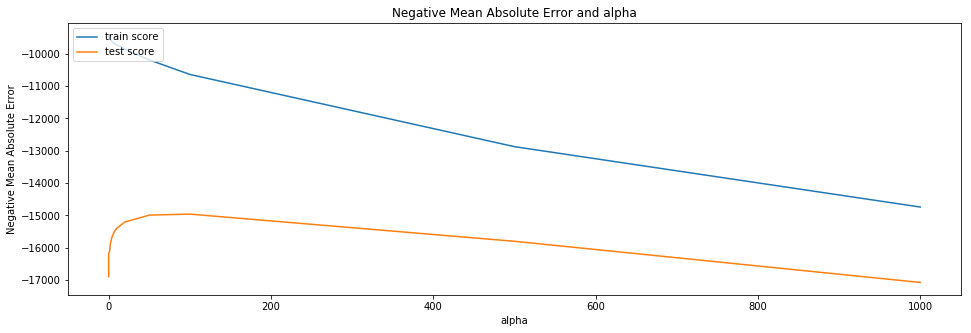

In [220]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [221]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-3.74990573e+02, -7.31989927e+02,  4.26452659e+03,  1.08427248e+03,
        4.36281263e+02, -4.61610470e+03, -3.39036939e+03,  1.98236112e+03,
       -2.37267031e+02, -3.92637529e+03,  1.11777739e+04,  3.65674147e+02,
        3.59933946e+03,  2.05432176e+02,  1.32605145e+04,  5.00234214e+03,
        1.84555959e+03,  1.57122405e+03, -4.73759794e+00,  1.40344266e+03,
        1.66000767e+03,  3.74206826e+02,  2.18227101e+02,  1.09501389e+02,
        8.28358000e+01, -8.39539149e+02, -4.26348853e+01,  3.61584553e+02,
       -4.32612622e+02,  7.66745453e+02,  5.24494148e+02,  2.07463703e+03,
       -5.31902169e+02, -1.43316517e+02, -1.40466828e+03, -1.63913733e+03,
       -2.52227472e+03, -4.19460844e+01, -3.58681139e+02,  1.44172536e+03,
        4.27318022e+02,  1.19598375e+03, -7.50554749e+01,  1.66350192e+03,
       -1.53486972e+02, -4.27218358e+01,  2.95021322e+02, -8.53050578e+02,
       -3.38898758e+02,  1.41341267e+03, -1.38472509e+03, -3.56277520e+02,
        1.96317765e+02,  

In [222]:
#lets predict the R-squared value of train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9471492959522058


In [223]:
#lets predict the R-squared value of test data
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8907085544845241


## Lasso

In [224]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   38.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [225]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.374385,0.068221,0.002798,0.001469,0.0001,{'alpha': 0.0001},-14762.044107,-17198.083595,-16241.986551,-17861.617738,...,-17155.421825,1649.623530,28,-9602.596813,-9146.967212,-9643.091840,-9453.774271,-9376.825652,-9444.651158,177.552694
1,0.286837,0.050681,0.001999,0.000633,0.001,{'alpha': 0.001},-14762.039331,-17197.890759,-16241.669245,-17860.665800,...,-17154.952803,1649.305197,27,-9602.599182,-9146.967977,-9643.091930,-9453.780392,-9376.827705,-9444.653437,177.552786
2,0.462823,0.111057,0.003598,0.001852,0.01,{'alpha': 0.01},-14761.991177,-17196.241653,-16238.542220,-17851.145817,...,-17150.327452,1646.119805,26,-9602.624355,-9146.976973,-9643.093314,-9453.841568,-9376.849736,-9444.677189,177.553504
3,0.455907,0.130909,0.003997,0.001412,0.05,{'alpha': 0.05},-14761.768838,-17189.768748,-16225.297757,-17808.834911,...,-17130.071712,1631.933755,25,-9602.740533,-9147.058734,-9643.101027,-9454.114812,-9376.948442,-9444.792710,177.543781
4,0.298829,0.042520,0.002003,0.000891,0.1,{'alpha': 0.1},-14761.498154,-17182.227453,-16209.375990,-17755.953013,...,-17104.992980,1614.219171,24,-9602.891956,-9147.215624,-9643.079163,-9454.454790,-9377.095945,-9444.947496,177.505549


In [226]:
#lets find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   28.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [227]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.222074,0.020796,0.001597,0.000488,0.0001,{'alpha': 0.0001},0.884751,0.869477,0.797711,0.851437,...,0.820152,0.068058,28,0.961429,0.960242,0.959801,0.961768,0.960207,0.960689,0.000766
1,0.221673,0.024401,0.002001,0.000001,0.001,{'alpha': 0.001},0.884753,0.869477,0.797727,0.851454,...,0.820176,0.068030,27,0.961429,0.960242,0.959801,0.961768,0.960207,0.960689,0.000766
2,0.228073,0.014689,0.001597,0.000488,0.01,{'alpha': 0.01},0.884769,0.869483,0.797883,0.851625,...,0.820408,0.067745,26,0.961429,0.960241,0.959801,0.961768,0.960207,0.960689,0.000766
3,0.219276,0.013452,0.001797,0.000399,0.05,{'alpha': 0.05},0.884834,0.869504,0.798479,0.852357,...,0.821409,0.066496,25,0.961429,0.960241,0.959800,0.961767,0.960206,0.960689,0.000766
4,0.218081,0.021438,0.001799,0.000399,0.1,{'alpha': 0.1},0.884913,0.869528,0.799118,0.853207,...,0.822611,0.064963,24,0.961429,0.960241,0.959799,0.961766,0.960206,0.960688,0.000766
5,0.223276,0.018113,0.001597,0.000487,0.2,{'alpha': 0.2},0.885066,0.869570,0.800242,0.854688,...,0.824902,0.061970,23,0.961428,0.960240,0.959798,0.961763,0.960204,0.960687,0.000766
6,0.226875,0.010213,0.001597,0.000488,0.3,{'alpha': 0.3},0.885218,0.869606,0.801247,0.855874,...,0.827049,0.059085,22,0.961427,0.960239,0.959796,0.961760,0.960203,0.960685,0.000765
7,0.227750,0.014147,0.002414,0.002882,0.4,{'alpha': 0.4},0.885370,0.869641,0.802154,0.856767,...,0.829058,0.056312,21,0.961426,0.960238,0.959794,0.961758,0.960201,0.960684,0.000765
8,0.243969,0.017324,0.001594,0.000485,0.5,{'alpha': 0.5},0.885522,0.869672,0.802964,0.857371,...,0.830923,0.053661,20,0.961425,0.960237,0.959792,0.961755,0.960199,0.960682,0.000765
9,0.239866,0.021968,0.001400,0.000484,0.6,{'alpha': 0.6},0.885669,0.869699,0.803689,0.857680,...,0.832648,0.051128,19,0.961424,0.960236,0.959790,0.961752,0.960198,0.960680,0.000765


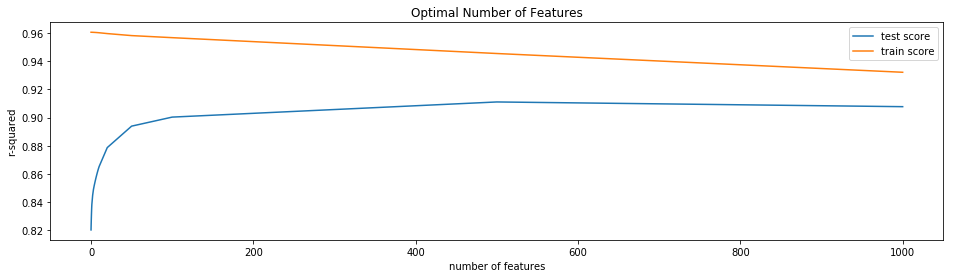

In [228]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [229]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 500}
-13975.710091212179


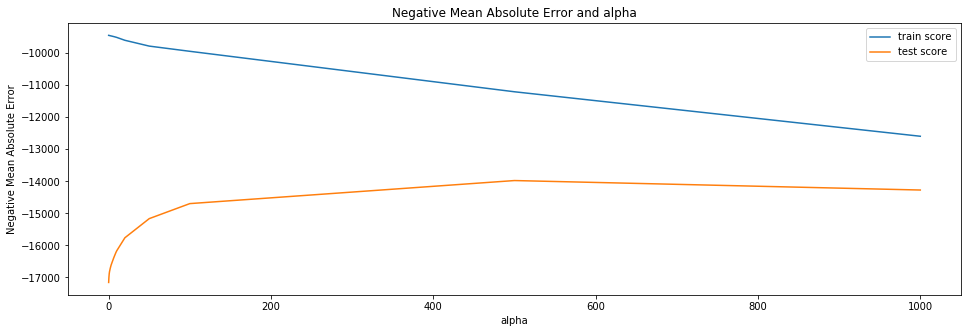

In [230]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [231]:
alpha = 500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [232]:
#lets predict the R-squared value of train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.941871190899721


In [233]:
#lets predict the R-squared value of test data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9054716056842825


In [234]:
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00,  3.92331308e+03,  7.42446685e+02,
        1.21491642e+02, -9.41636105e+03, -3.83370855e+03,  9.14720709e+02,
       -4.14650974e+02, -6.10358464e+03,  1.15609390e+04,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  2.50584594e+04,  3.62011857e+03,
        1.08309556e+03,  9.66962403e+02,  0.00000000e+00,  7.60844869e+02,
        1.37935941e+03,  8.60998721e+01,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.86490399e+02,
       -5.60635947e+02,  0.00000000e+00,  0.00000000e+00,  9.09796812e+01,
        0.00000000e+00,  0.00000000e+00, -1.87380772e+03, -2.69544652e+02,
       -1.43256843e+03, -0.00000000e+00, -0.00000000e+00,  8.59287274e+02,
        0.00000000e+00,  0.00000000e+00, -1.12550766e+02,  1.21772978e+03,
       -1.93766434e+02, -0.00000000e+00,  1.39360260e+02, -0.00000000e+00,
        0.00000000e+00,  1.01732582e+03, -8.07365574e+02, -0.00000000e+00,
        0.00000000e+00, -